# Stock Price Prediction Using Linear Regression

A Stock market is a public market where we can buy and sell shares for publicly listed companies. The stock exchange is the mediator that allows the buying and selling of shares.

### Stock Price Prediction

Stock Price Prediction using the Linear Regression helps in discovering the future value of company stock and other financial assets trade on an exchange. The entire idea of predicting stock prices is to gain significant profits.

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

The dataset is stored in csv format.
The columns of the dataset are:
1. Date      - The date of the record
2. Open      - The opening price of the day (when trading starts).
3. High      - The highest trade price during the day.
4. Low       - The lowest trade price during the day.
5. Close     - The closing price for the day (when trading is finished).
6. Adj Close - The daily closing price, adjusted retroactively to include any                  coporate actions.
7. Volume    - The number of shares traded.

### Import the dataset

In [2]:
df = pd.read_csv('C:/Users/grees/PycharmProjects/pythonProject_1/Stock_Price_data_set.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


#### Convert the Date column in datetime format 

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.shape

(1009, 7)

#### Correlation between the data

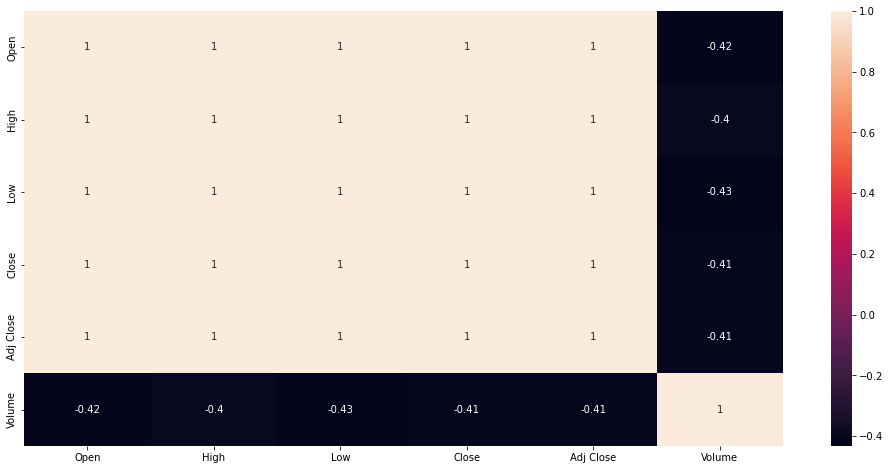

In [8]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(df.corr(), annot = True)

# 

## Linear Regression

The dataset contains independent variable(x) and the depenedent variable(y), which is used to predict the stock price. To fit a line to the data points, which then represents an estimates relationship between x and y, we use a simple linear regression method.

The best fit line can be described with:
                                y = β0 + β1x
where
1. y is the predicetd value of the dependent variable.
2. β0 is the y-intercept.
3. β1 is the slope.
4. x is the value of teh independent variable.

The goal is to find such coefficients β0 and β1 that the Sum of Squared errors, which represents the difference between each point in the dataset with its corresponding predicted value outputed by the model.


### Training a Linear regression model

#### Train Test Split

In [9]:
x = df[['High', 'Low', 'Open', 'Volume']].values
y = df['Close'].values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Linear Regression Model

In [11]:
model = LinearRegression()

#### Fitting the data in the model

In [12]:
model.fit(x_train, y_train)

LinearRegression()

### Model Evaluation

In [13]:
print('Slope: ',model.coef_)

Slope:  [ 7.52637059e-01  8.57461003e-01 -6.08525352e-01  9.16527846e-08]


In [14]:
print('Intercept: ',model.intercept_)

Intercept:  -0.4790625251108054


In [15]:
predictor = model.predict(x_test)

In [16]:
print(predictor)

[553.9710123  379.75715499 360.31052939 283.77600754 260.12841761
 434.75951257 260.74990787 518.66873943 315.48347691 345.48489762
 520.05031298 319.57645542 492.61437106 298.45577973 509.20270074
 499.14347163 290.73182569 550.55425666 338.1050594  268.88774901
 338.98198038 293.36742057 461.44827732 361.95950034 288.38667137
 502.66802929 500.35576967 295.64490973 353.29496368 369.09476262
 280.44095715 542.32936631 317.56873022 539.36107029 309.9250409
 519.5780388  344.81937045 367.38697797 512.14902109 633.15564047
 483.94701584 298.20399113 298.66713838 265.54380772 518.05906843
 292.73396801 297.48202484 381.96007664 357.34378049 408.02376354
 367.23809342 601.11033304 481.83052369 515.0560907  368.23912408
 418.10837009 376.20960154 356.89297158 379.6300562  357.62789099
 291.36418889 499.92180647 491.86625613 413.70317551 328.2744003
 502.62529906 505.68233846 352.21466919 323.58857255 341.1969402
 656.8616296  353.12697402 265.0054111  266.65276056 435.13208372
 545.96035895

In [17]:
dframe = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':predictor.flatten()})

In [18]:
dframe.head(25)

,Actual,Predicted
0,553.729980,553.971012
1,379.059998,379.757155
2,361.399994,360.310529
3,281.859985,283.776008
4,261.429993,260.128418
5,434.480011,434.759513
6,265.720001,260.749908
7,518.020020,518.668739
8,315.929993,315.483477
9,348.869995,345.484898


## Error Evaluation Metrics

Mean Absolute Error (MAE): is the mean of the absolute values of the errors.

Mean Squared Error (MSE) : is the mean of the squared errors.

Root Mean Squared Error (RMSE) : is the square root of the mean of the squared errors.

In [19]:
print("Mean Absolue Error: ", metrics.mean_absolute_error(y_test, predictor))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, predictor))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predictor)))

Mean Absolue Error:  2.9013198795523873
Mean Squared Error:  16.993648469949527
Root Mean Squared Error:  4.122335317505058


## Plot Predicted Price Vs Actual Prices

In [20]:
graph = dframe.head(20)

<AxesSubplot:>

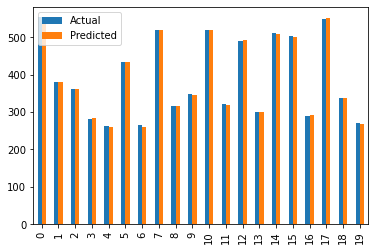

In [21]:
graph.plot(kind='bar')